In [112]:
# Import necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [113]:
''' Parameter list for all images '''
image_files = [
    {
        'filename': 'Img1.jpg',
        'savename': 'ece661_pics\hw3_task3_1_result.jpg',
        'p': np.asarray([573, 207, 1]),
        'q': np.asarray([966, 342, 1]),
        'r': np.asarray([549, 719, 1]),
        's': np.asarray([1005, 759, 1]),
        't': np.asarray([109, 542, 1]),
        'u': np.asarray([96, 675, 1]),
        'v': np.asarray([239, 686, 1])
    },
    {
        'filename': 'Img2.jpeg',
        'savename': 'ece661_pics\hw3_task3_2_result.jpg',
        'p': np.asarray([367, 554, 1]),
        'q': np.asarray([662, 510, 1]),
        'r': np.asarray([364, 853, 1]),
        's': np.asarray([642, 973, 1]),
        't': np.asarray([478, 567, 1]),
        'u': np.asarray([480, 711, 1]),
        'v': np.asarray([597, 723, 1])
    },
    {
        'filename': 'Img3.jpg',
        'savename': 'ece661_pics\hw3_task3_3_result.jpg',
        'p': np.asarray([1011, 349, 1]),
        'q': np.asarray([1304, 359, 1]),
        'r': np.asarray([1023, 728, 1]),
        's': np.asarray([1322, 653, 1]),
        't': np.asarray([1462, 381, 1]),
        'u': np.asarray([1638, 384, 1]),
        'v': np.asarray([1623, 566, 1])
    },
    {
        'filename': 'Img4.jpg',
        'savename': 'ece661_pics\hw3_task3_4_result.jpg',
        'p': np.asarray([730, 237, 1]),
        'q': np.asarray([1481, 178, 1]),
        'r': np.asarray([800, 977, 1]),
        's': np.asarray([1496, 1008, 1]),
        't': np.asarray([1285, 572, 1]),
        'u': np.asarray([1295, 646, 1]),
        'v': np.asarray([943, 659, 1])
    },
    {
        'filename': 'Img5.jpg',
        'savename': 'ece661_pics\hw3_task3_5_result.jpg',
        'p': np.asarray([406, 21, 1]),
        'q': np.asarray([1320, 204, 1]),
        'r': np.asarray([502, 1009, 1]),
        's': np.asarray([1338, 668, 1]),
        't': np.asarray([1101, 196, 1]),
        'u': np.asarray([1132, 703, 1]),
        'v': np.asarray([516, 927, 1])
    },
]

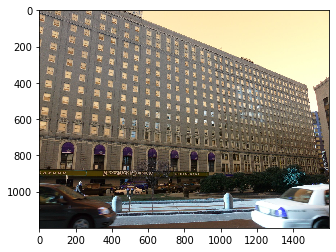

In [114]:
image = image_files[0]
source_img = cv.imread(image['filename'])
plt.imshow(source_img)
w = source_img.shape[1]
h = source_img.shape[0]

In [115]:
''' creat 5 pairs of line '''
l1 = np.cross(image['p'], image['q'])
m1 = np.cross(image['p'], image['r'])
l2 = np.cross(image['r'], image['s'])
m2 = np.cross(image['r'], image['p'])
l3 = np.cross(image['p'], image['q'])
m3 = np.cross(image['q'], image['s'])
l4 = np.cross(image['r'], image['s'])
m4 = np.cross(image['q'], image['s'])
l5 = np.cross(image['t'], image['u'])
m5 = np.cross(image['u'], image['v'])
l1 = l1 / l1[2]
l2 = l2 / l2[2]
l3 = l3 / l3[2]
l4 = l4 / l4[2]
l5 = l5 / l5[2]
m1 = m1 / m1[2]
m2 = m2 / m2[2]
m3 = m3 / m3[2]
m4 = m4 / m4[2]
m5 = m5 / m5[2]

A = []
b = []

A.append([l1[0]*m1[0], (l1[0]*m1[1] + l1[1]*m1[0])/2, l1[1]*m1[1], (l1[0]*m1[2] + l1[2]*m1[0])/2, (l1[1]*m1[2] + l1[2]*m1[1])/2])
b.append([-1 * l1[2] * m1[2]])
A.append([l2[0]*m2[0], (l2[0]*m2[1] + l2[1]*m2[0])/2, l2[1]*m2[1], (l2[0]*m2[2] + l2[2]*m2[0])/2, (l2[1]*m2[2] + l2[2]*m2[1])/2])
b.append([-1 * l2[2] * m2[2]])
A.append([l3[0]*m3[0], (l3[0]*m3[1] + l3[1]*m3[0])/2, l3[1]*m3[1], (l3[0]*m3[2] + l3[2]*m3[0])/2, (l3[1]*m3[2] + l3[2]*m3[1])/2])
b.append([-1 * l3[2] * m3[2]])
A.append([l4[0]*m4[0], (l4[0]*m4[1] + l4[1]*m4[0])/2, l4[1]*m4[1], (l4[0]*m4[2] + l4[2]*m4[0])/2, (l4[1]*m4[2] + l4[2]*m4[1])/2])
b.append([-1 * l4[2] * m4[2]])
A.append([l5[0]*m5[0], (l5[0]*m5[1] + l5[1]*m5[0])/2, l5[1]*m5[1], (l5[0]*m5[2] + l5[2]*m5[0])/2, (l5[1]*m5[2] + l5[2]*m5[1])/2])
b.append([-1 * l5[2] * m5[2]])

A = np.asarray(A)
b = np.asarray(b)

A = np.asarray(A)
A_inv = np.linalg.pinv(A)
abcde = np.dot(A_inv, b)
abcde = abcde / np.max(abcde)

In [116]:
C = np.zeros((3, 3))
C[0][0] = abcde[0]
C[0][1] = abcde[1]/2
C[0][2] = abcde[3]/2
C[1][0] = abcde[1]/2
C[1][1] = abcde[2]
C[1][2] = abcde[4]/2
C[2][0] = abcde[3]/2
C[2][1] = abcde[4]/2
C[2][2] = 1


In [117]:
''' build homography matrix '''
S = C[:2, :2]
u, s, vh = np.linalg.svd(S)
D = np.sqrt(np.diag(s))

A = np.dot(np.dot(vh, D), vh.T)
t = np.asarray([C[2][0], C[2][1]])
v = np.dot(np.linalg.pinv(A), t)

H = np.zeros((3, 3))
H[:2, :2] = A
H[2, :2] = v
H[2][2] = 1
H_inv = np.linalg.pinv(H)
H_inv = H_inv / H_inv[2, 2]

In [118]:
''' Parameters for creating result canvas '''
img_p = np.asarray([0, 0, 1])
world_p = np.dot(H_inv, img_p)
world_p = world_p / world_p[2]

img_q = np.asarray([w-1, 0, 1])
world_q = np.dot(H_inv, img_q)
world_q = world_q / world_q[2]

img_r = np.asarray([0, h-1, 1])
world_r = np.dot(H_inv, img_r)
world_r = world_r / world_r[2]

img_s = np.asarray([w-1, h-1, 1])
world_s = np.dot(H_inv, img_s)
world_s = world_s / world_s[2]

min_x = int(min(world_p[0], world_q[0], world_r[0], world_s[0]))
max_x = int(max(world_p[0], world_q[0], world_r[0], world_s[0]))
min_y = int(min(world_p[1], world_q[1], world_r[1], world_s[1]))
max_y = int(max(world_p[1], world_q[1], world_r[1], world_s[1]))

scale1 = source_img.shape[0] / (max_y - min_y)
scale2 = source_img.shape[1] / (max_x - min_x)
scale = max(scale1, scale2)

offset_x = int(min_x) 
offset_y = int(min_y) 

size_x = int((max_x - min_x) * scale)
size_y = int((max_y - min_y) * scale)

result_img = np.zeros((size_y, size_x, 3))

True

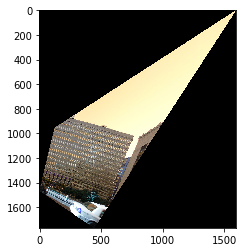

In [119]:
'''Remove projection distortion '''
for i in range(result_img.shape[1]):
    for j in range(result_img.shape[0]):
        point = np.asarray([i/scale + offset_x, j/scale + offset_y, 1])
        result_pts = np.dot(H, point)
        result_x = result_pts[0] / result_pts[2]
        result_y = result_pts[1] / result_pts[2]
        if result_x > 0 and result_y > 0 and result_x < w and result_y < h:
            result_img[j][i] = source_img[int(result_y)][int(result_x)]
plt.imshow(result_img.astype(np.int))
cv.imwrite(image['savename'], result_img.astype(np.int))